# Preparación del entorno

In [0]:
!git clone https://github.com/fizyr/keras-retinanet.git

Cloning into 'keras-retinanet'...
remote: Enumerating objects: 85, done.
remote: Counting objects: 100% (85/85), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 5705 (delta 28), reused 38 (delta 15), pack-reused 5620
Receiving objects: 100% (5705/5705), 14.07 MiB | 15.94 MiB/s, done.
Resolving deltas: 100% (3798/3798), done.


In [0]:
!pip install --upgrade keras

Requirement already up-to-date: keras in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [0]:
%cd keras-retinanet/

!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=170903 sha256=1bab6c9c6e087452673299c6a47523b59b5ee709cbe34b1d658a3d62cf636a2d
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
  Created wheel for keras-resnet: filename=keras_resnet-0.1.0-py2.py3-none-any.whl size=13346 sha256=422248546308c863a0115ef352264ef1223c564de33edc244541f24748873c37
  Stored in directory: /root/.cache/pip/wheels/80/dd/ac/842235b63dddac12faa4b48ebe58b8944e8c2e57c2e38dddb6
Successfully built keras-retinanet keras-resnet


In [0]:
!python setup.py build_ext --inplace

running build_ext
cythoning keras_retinanet/utils/compute_overlap.pyx to keras_retinanet/utils/compute_overlap.c
/usr/local/lib/python3.6/dist-packages/Cython/Compiler/Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: /content/keras-retinanet/keras_retinanet/utils/compute_overlap.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
building 'keras_retinanet.utils.compute_overlap' extension
creating build
creating build/temp.linux-x86_64-3.6
creating build/temp.linux-x86_64-3.6/keras_retinanet
creating build/temp.linux-x86_64-3.6/keras_retinanet/utils
x86_64-linux-gnu-gcc -pthread -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -Wdate-time -D_FORTIFY_SOURCE=2 -fPIC -I/usr/include/python3.6m -I/usr/local/lib/python3.6/dist-packages/numpy/core/include -c keras_retinanet/utils/compute_overlap.c -o build/temp.linux-x86_64-3.6/keras_retinanet/utils/compute_over

In [0]:
!pip install gdown
!pip install tensorflow-gpu

     |████████████████████████████████| 421.8MB 42kB/s 
     |████████████████████████████████| 450kB 57.3MB/s 
     |████████████████████████████████| 3.9MB 59.5MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=2cfadf2c97610ff952082a08d8faa2d4d3d4c262ac388d72e8d6af4f3b7d28c8
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow 2.2.0rc3 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 2.1.1 which is incompatible.
ERROR: tensorflow 2.2.0rc3 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 2.1.0 which is incompatible.
ERROR: tensorflow-probability 0.10.0rc0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: gast 0.3.3
    Uninstall

In [0]:
ls

build/           images/           README.md         setup.py
CONTRIBUTORS.md  keras_retinanet/  requirements.txt  snapshots/
examples/        LICENSE           setup.cfg         tests/


# Preprocesamiento de datos

In [0]:
#%tensorflow_version 1.x

In [0]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import glob
import os
import cv2
from PIL import Image
import tensorflow as tf
import seaborn as sns
from matplotlib import rc
from sklearn.model_selection import train_test_split
import urllib
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color

import time

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.5)

RANDOM_SEED = 42

np.random.seed(RANDOM_SEED)
#tf.random.set_random_seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
tf.__version__

'2.1.0'

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
ls

build/           images/           README.md         setup.py
CONTRIBUTORS.md  keras_retinanet/  requirements.txt  snapshots/
examples/        LICENSE           setup.cfg         tests/


In [0]:
ls '/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Images'

'DATASET WITH CSV '/   hands_ma/               Imagenes_etiquetadas_PascalVOC/
 hands_ab/             Imagenes_etiquetadas/  'Imagenes (YA ETIQUETADAS!)'/


In [0]:
ls '/content/drive/My Drive/DataProject 4/5. Vision Artificial/05_Modelos_Entrenados/01_Hand_Detection/02_Modelos/Diego'

resnet50_csv_tf1_01.h5  resnet50_csv_tf2_11.h5  TFLite/
resnet50_csv_tf2_05.h5  resnet50_csv_tf2_12.h5


In [0]:
PATH = '/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Images/Imagenes_etiquetadas'

In [0]:
def annotation_rel2absolute(data):
  # Input xc, yc, width, height --> Output xmin, ymin, xmax, ymax
  data['xc'] = data['xc'] * data['image_width']
  data['yc'] = data['yc'] * data['image_height']
  data['width'] = data['width'] * data['image_width']
  data['height'] = data['height'] * data['image_height']

  data['xmin'] = data['xc']-data['width']/2
  data['ymin'] = data['yc']-data['height']/2
  data['xmax'] = data['xc']+data['width']/2
  data['ymax'] = data['yc']+data['height']/2

  data['xmin'] = data['xmin'].astype(int)
  data['xmax'] = data['xmax'].astype(int)
  data['ymin'] = data['ymin'].astype(int)
  data['ymax'] = data['ymax'].astype(int)

  return data[['filename','xmin','ymin','xmax','ymax','class']]

In [0]:
def annotation_txt2csv(path):
    start = time.time()
    startdir = os.getcwd()
    # Change directory
    os.chdir(path)
    
    # **************** READ INPUT FILES ******************
    # Get all .txt files except classes.txt
    txt_files = sorted(glob.glob('[!classes]*.txt'))
    # Get all image files
    image_files = sorted(glob.glob('*.jp*'))
    classes_file = glob.glob('classes.txt')

    classes = pd.read_csv(classes_file[0],header=None)
    classes = classes.values.tolist()
    print('{} annotation files, {} image files and {} class files have been found'.format(len(txt_files), len(image_files), len(classes_file)))
    
    data = pd.DataFrame(data = None,  columns = ['filename','xc','yc','width','height','class','image_width','image_height'])

    if((len(txt_files) == len(image_files)) and len(classes_file)==1):
        # Same number of txt files and images
        
        
        # Escribimos un loop que irá a través de cada uno de los nombres de archivo a través de globbing y el resultado final será la lista dataframes
    
        for filename, image in zip(txt_files, image_files):
    
            if(filename.split('.')[0] == image.split('.')[0]):
              im = Image.open(image)
              w,h = im.size
              
              loaddata = pd.read_csv(filename, sep=" ", header = None)
              loaddata.columns = ['class','xc','yc','width','height']
              
              for i,clas in enumerate(loaddata['class']):
                loaddata.iloc[i,0] = classes[clas][0]
              
              loaddata['filename'] = path + '/' + image
              loaddata['image_width'] = w
              loaddata['image_height'] = h
              
              data = data.append(loaddata)

            else:
              print(filename,image)
              print('Image files and txt files do not match.')

        #Write output file
        #res3.to_csv('datos_manos.csv',sep=';')
    data = annotation_rel2absolute(data)
    print(time.time() - start)
    os.chdir(startdir)
    return data, txt_files, image_files

In [0]:
def show_image_with_annotations(image_file,annotation_file):

  print(image_file, annotation_file)

  im = cv2.imread(image_file)
  h,w,c = im.shape

  #im = Image.open(image_file)
  #w,h = im.size
  

  csv = pd.read_csv(annotation_file, sep = ' ', header = None)
  csv.columns = ['class','xmin','ymin','xmax','ymax']
  print(csv)
  csv[['xmin','xmax']] *= w
  csv[['ymin','ymax']] *= h

  csv['xmin'] = csv['xmin'].astype(int)
  csv['xmax'] = csv['xmax'].astype(int)
  csv['ymin'] = csv['ymin'].astype(int)
  csv['ymax'] = csv['ymax'].astype(int)

  for i in range(0,len(csv)):
    f, xc, yc, width, height = csv.iloc[i]
    im = cv2.rectangle(im, (int(xc-width/2),int(yc-height/2)),(int(xc+width/2),int(yc+height/2)), (0,255,0), 10)

  plt.imshow(im[:,:,::-1])

In [0]:
def show_image_with_annotations_csv(csv):

  print(csv)
  f, xmin, ymin, xmax, ymax, cl = csv
  im = cv2.imread(f)
  im = cv2.rectangle(im, (xmin,ymin),(xmax,ymax), (0,255,0), 10)

  figure = plt.figure(figsize=(10,10))
  plt.axis('off')
  plt.imshow(im[:,:,::-1])

In [0]:
data, txt_files, image_files = annotation_txt2csv(PATH)

136 annotation files, 136 image files and 1 class files have been found
IMG_6524.txt IMG_20200420_152443.jpg
Image files and txt files do not match.
108.14737010002136


In [0]:
for i in range(0,len(txt_files)):
  txt = txt_files[i].split(".")[0]
  image = image_files[i].split(".")[0]
  if(txt!=image):
    print(i,txt_files[i],image_files[i])

130 IMG_6524.txt IMG_20200420_152443.jpg


In [0]:
data.head()

,filename,xmin,ymin,xmax,ymax,class
0,/content/drive/My Drive/DataProject 4/5. Visio...,47,802,836,1606,hand
0,/content/drive/My Drive/DataProject 4/5. Visio...,590,291,1461,1150,hand
0,/content/drive/My Drive/DataProject 4/5. Visio...,1,3116,1343,5094,hand
0,/content/drive/My Drive/DataProject 4/5. Visio...,0,2494,1042,3934,hand
0,/content/drive/My Drive/DataProject 4/5. Visio...,586,2125,1104,3679,hand


In [0]:
data.shape

(138, 6)

filename    /content/drive/My Drive/DataProject 4/5. Visio...
xmin                                                        4
ymin                                                      622
xmax                                                      818
ymax                                                     1358
class                                                    hand
Name: 0, dtype: object


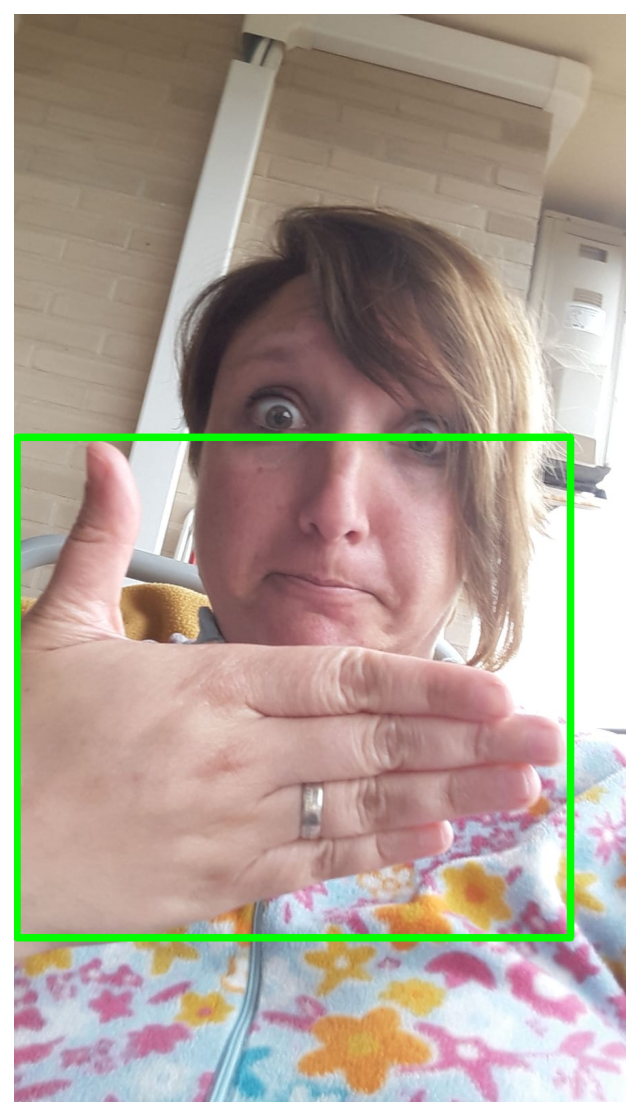

In [0]:
show_image_with_annotations_csv(data.iloc[62])

In [0]:
ls

build/           examples/         LICENSE           setup.cfg   tests/
classes.csv      images/           README.md         setup.py
CONTRIBUTORS.md  keras_retinanet/  requirements.txt  snapshots/


In [0]:
ANNOTATIONS_FILE = 'annotations.csv'
CLASSES_FILE = 'classes.csv'


In [0]:
train_data, test_data = train_test_split(
  data, 
  test_size=0.2, 
  random_state=RANDOM_SEED
)

In [0]:
print('Length of training data: {} \nLength of validation data: {}'.format(len(train_data),len(test_data)))

Length of training data: 110 
Length of validation data: 28


In [0]:
classes = set(['hand'])

with open(CLASSES_FILE, 'w') as f:
  for i, line in enumerate(sorted(classes)):
    f.write('{},{}\n'.format(line,i))

In [0]:
train_data.to_csv(ANNOTATIONS_FILE, index = False, header = None)
test_data.to_csv('test_annotations.csv', index = False, header = None)
data.to_csv('data_annotations.csv', index = False, header = None)

In [0]:
ls

annotations.csv  data_annotations.csv  LICENSE           setup.py
build/           examples/             README.md         snapshots/
classes.csv      images/               requirements.txt  test_annotations.csv
CONTRIBUTORS.md  keras_retinanet/      setup.cfg         tests/


In [0]:
!head annotations.csv

/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Images/Imagenes_etiquetadas/Copia de IMG_20200416_182740.jpg,243,2712,1755,4295,hand
/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Images/Imagenes_etiquetadas/IMG-20200420-WA0054.jpg,39,996,520,1600,hand
/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Images/Imagenes_etiquetadas/IMG-20200417-WA0046.jpg,739,1152,1535,2035,hand
/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Images/Imagenes_etiquetadas/Copia de IMG_20200416_182742.jpg,44,2509,780,4234,hand
/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Images/Imagenes_etiquetadas/IMG-20200420-WA0055(1).jpg,56,793,530,1373,hand
/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Images/Imagenes_etiquetadas/IMG-20200417-WA0099.jpg,8,598,596,1094,hand
/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Ima

In [0]:
!head classes.csv

hand,0


#Training

In [0]:
download_model = True

if(download_model):
  PRETRAINED_MODEL = './snapshots/_pretrained_model.h5'

  URL_MODEL = 'https://github.com/fizyr/keras-retinanet/releases/download/0.5.1/resnet50_coco_best_v2.1.0.h5'
  urllib.request.urlretrieve(URL_MODEL, PRETRAINED_MODEL)
else:
  PRETRAINED_MODEL = '/content/drive/My Drive/DataProject 4/5. Vision Artificial/05_Modelos_Entrenados/01_Hand_Detection/02_Modelos/Diego/resnet50_csv_12.h5'
  
print('Downloaded pretrained model to ' + PRETRAINED_MODEL)

Downloaded pretrained model to ./snapshots/_pretrained_model.h5


In [0]:
!cp '/content/drive/My Drive/DataProject 4/5. Vision Artificial/05_Modelos_Entrenados/01_Hand_Detection/02_Modelos/Diego/resnet50_csv_tf2_12.h5' snapshots/_pretrained_resnet50_diego.h5

In [0]:
ls snapshots

_pretrained_model.h5


In [0]:
PRETRAINED_MODEL = 'snapshots/_pretrained_model.h5'

In [0]:
base_model = tf.keras.applications.MobileNetV2(input_shape=(224,224,3),
                                               include_top=False,
                                               weights='imagenet')

9412608/9406464 [==============================] - 2s 0us/step


In [0]:
base_model.save('./snapshots/mobilenet.h5')
PRETRAINED_MODEL = './snapshots/mobilenet.h5'

In [0]:
!keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL}  --backbone 'mobilenet128_1.0' --batch-size 8 --steps 500 --epochs 10 csv annotations.csv classes.csv

Using TensorFlow backend.
2020-04-27 22:13:52.402285: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-04-27 22:13:52.402404: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-04-27 22:13:52.402422: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
keras_retinanet/bin/train.py:371: UserWarning: Using experimental backbone mobilenet128_1.0. Only resnet50 has been properly tested.
  warnings.warn('Using experimental backbone {}. O

In [0]:
!keras_retinanet/bin/train.py --freeze-backbone --random-transform --weights {PRETRAINED_MODEL} --batch-size 8 --steps 500 --epochs 10 csv annotations.csv classes.csv

Using TensorFlow backend.
Creating model, this may take a second...
Instructions for updating:
If using Keras pass *_constraint arguments to layers.

2020-04-21 06:54:16.183471: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-04-21 06:54:16.219906: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-04-21 06:54:16.220481: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2020-04-21 06:54:16.220850: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2020-04-21 06:54:16.222903: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.1

# Loading trained model

In [0]:
!ls 

annotations.csv  examples	  README.md	    snapshots
build		 images		  requirements.txt  test_annotations.csv
classes.csv	 keras_retinanet  setup.cfg	    tests
CONTRIBUTORS.md  LICENSE	  setup.py


In [0]:
#model_path = PRETRAINED_MODEL
model_path = '/content/drive/My Drive/DataProject 4/5. Vision Artificial/05_Modelos_Entrenados/01_Hand_Detection/02_Modelos/Diego/resnet50_csv_tf2_12.h5'
model = models.load_model(model_path,backbone_name='resnet50')
model = models.convert_model(model)

labels_to_names = pd.read_csv(CLASSES_FILE, header=None).T.loc[0].to_dict()

Using TensorFlow backend.


tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [-50.796833, -50.796833,  50.7

In [0]:
model.save('./snapshots/my_model.h5')

# Predictions

In [0]:
def predict(image):
  image = preprocess_image(image.copy())
  image, scale = resize_image(image)

  boxes, scores, labels = model.predict_on_batch(
    np.expand_dims(image, axis=0)
  )

  boxes /= scale

  return boxes, scores, labels

In [0]:
THRES_SCORE = 0.6

def draw_detections(image, boxes, scores, labels, THRES_SCORE):
  for box, score, label in zip(boxes, scores, labels):
    if score < THRES_SCORE:
        break

    color = label_color(label)

    b = box.astype(int)
    draw_box(image, b, color=color)

    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(image, b, caption)


In [0]:
def show_detected_objects(image_row):
  img_path = image_row.image_name
  
  image = read_image_bgr(img_path)

  boxes, scores, labels = predict(image)

  draw = image.copy()
  draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

  true_box = [
    image_row.x_min, image_row.y_min, image_row.x_max, image_row.y_max
  ]
  draw_box(draw, true_box, color=(255, 255, 0))

  draw_detections(draw, boxes, scores, labels)

  plt.axis('off')
  plt.imshow(draw)
  plt.show()

In [0]:
train_data['filename'].iloc[0]

NameError: ignored

In [0]:
test_data

,filename,xmin,ymin,xmax,ymax,class
0,/content/drive/My Drive/DataProject 4/5. Visio...,7,894,595,1767,hand
0,/content/drive/My Drive/DataProject 4/5. Visio...,458,1535,1536,2036,hand
0,/content/drive/My Drive/DataProject 4/5. Visio...,608,3348,1719,4472,hand
0,/content/drive/My Drive/DataProject 4/5. Visio...,610,3033,1734,4327,hand
1,/content/drive/My Drive/DataProject 4/5. Visio...,267,39,527,444,hand
1,/content/drive/My Drive/DataProject 4/5. Visio...,177,86,484,355,hand
2,/content/drive/My Drive/DataProject 4/5. Visio...,526,107,847,454,hand
0,/content/drive/My Drive/DataProject 4/5. Visio...,244,1213,848,2048,hand
0,/content/drive/My Drive/DataProject 4/5. Visio...,528,1309,1536,2040,hand
0,/content/drive/My Drive/DataProject 4/5. Visio...,54,594,813,1174,hand


In [0]:
def model_prediction_display(imagePath, THRES_SCORE, nmsThresh):
  im = cv2.imread(imagePath)
  im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
  boxes, scores, labels = predict(im)
  boxes = boxes[0]
  scores = scores[0]
  labels = labels[0]
  boxes = boxes[scores>0]
  labels = labels[scores>0]
  scores = scores[scores>0]
  boxes = nms_fast(boxes,nmsThresh)
  draw_detections(im,boxes,scores,labels, THRES_SCORE)
  plt.figure(figsize=(10,10))
  plt.grid(None)
  plt.imshow(im)

In [0]:
# Malisiewicz et al.
def nms_fast(boxes, overlapThresh):
	# if there are no boxes, return an empty list
	if len(boxes) == 0:
		return []
	# if the bounding boxes integers, convert them to floats --
	# this is important since we'll be doing a bunch of divisions
	if boxes.dtype.kind == "i":
		boxes = boxes.astype("float")
	# initialize the list of picked indexes	
	pick = []
	# grab the coordinates of the bounding boxes
	x1 = boxes[:,0]
	y1 = boxes[:,1]
	x2 = boxes[:,2]
	y2 = boxes[:,3]
	# compute the area of the bounding boxes and sort the bounding
	# boxes by the bottom-right y-coordinate of the bounding box
	area = (x2 - x1 + 1) * (y2 - y1 + 1)
	idxs = np.argsort(y2)
	# keep looping while some indexes still remain in the indexes
	# list
	while len(idxs) > 0:
		# grab the last index in the indexes list and add the
		# index value to the list of picked indexes
		last = len(idxs) - 1
		i = idxs[last]
		pick.append(i)
		# find the largest (x, y) coordinates for the start of
		# the bounding box and the smallest (x, y) coordinates
		# for the end of the bounding box
		xx1 = np.maximum(x1[i], x1[idxs[:last]])
		yy1 = np.maximum(y1[i], y1[idxs[:last]])
		xx2 = np.minimum(x2[i], x2[idxs[:last]])
		yy2 = np.minimum(y2[i], y2[idxs[:last]])
		# compute the width and height of the bounding box
		w = np.maximum(0, xx2 - xx1 + 1)
		h = np.maximum(0, yy2 - yy1 + 1)
		# compute the ratio of overlap
		overlap = (w * h) / area[idxs[:last]]
		# delete all indexes from the index list that have
		idxs = np.delete(idxs, np.concatenate(([last],
			np.where(overlap > overlapThresh)[0])))
	# return only the bounding boxes that were picked using the
	# integer data type
	return boxes[pick].astype("int")

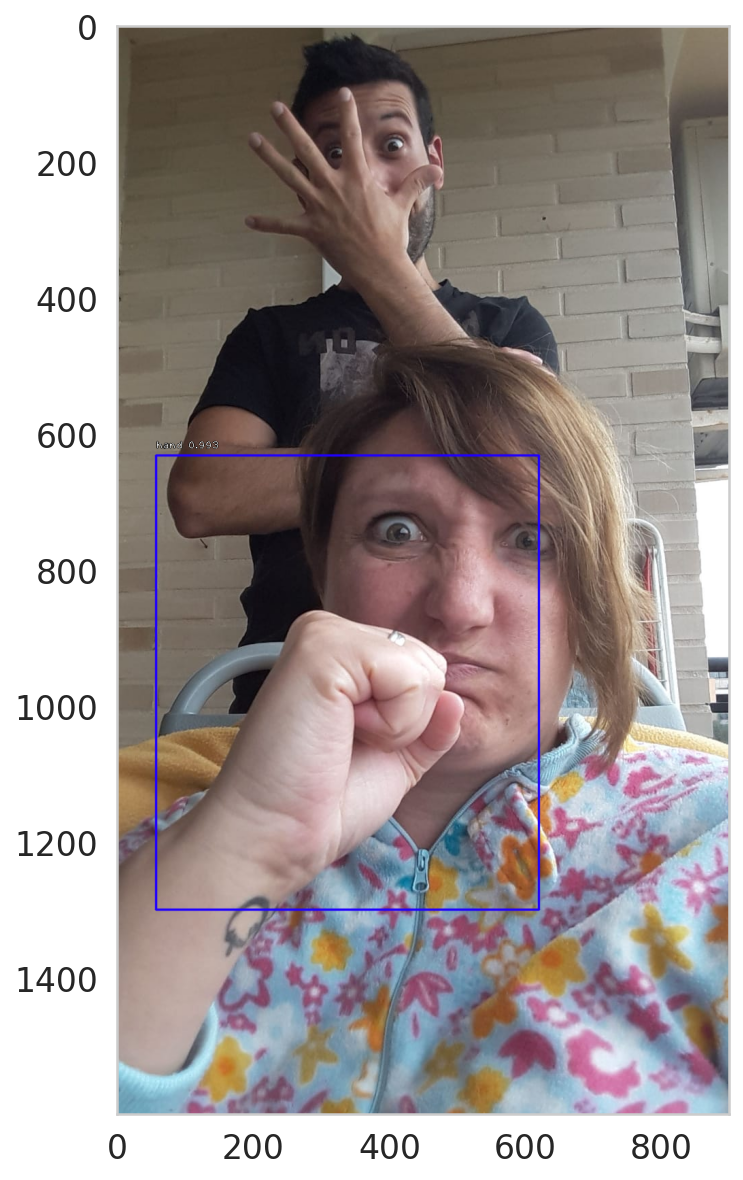

In [0]:
model_prediction_display(data['filename'].iloc[66],0.6,0.3)

In [0]:
imagePath = data['filename'].iloc[104]
im = cv2.imread(imagePath)
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
boxes, scores, labels = predict(im)

In [0]:
boxes = boxes[0]
labels = labels[0]
scores = scores[0]
boxes = boxes[scores>0]
labels = labels[scores>0]
scores = scores[scores>0]

array([[ 0.57520485,  0.517935  ,  0.22723421,  0.13315144,  0.09903628,
         0.07734162,  0.05514541,  0.05099517, -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1.        , -1.        ,
        -1.        , -1.        , -1.        , -1. 

In [0]:
boxes

array([[   0, 1478,  923, 2046],
       [ 701, 1230, 1290, 2046],
       [ 422,  672, 1262, 1629]])

In [0]:
scores[0]>0

array([ True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [0]:
for image in train_data['filename']:
  model_prediction_display(image,0.6)

In [0]:
PATH = '/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Images/Imagenes_SIN_etiquetar'

In [0]:
current_dir = os.getcwd()
os.chdir(PATH)

In [0]:
images = Path(PATH)

In [0]:
list(images.iterdir())

[PosixPath('/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Images/Imagenes_SIN_etiquetar/IMG_20200420_152600.jpg'),
 PosixPath('/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Images/Imagenes_SIN_etiquetar/IMG_20200420_152556.jpg'),
 PosixPath('/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Images/Imagenes_SIN_etiquetar/IMG_20200420_152552.jpg'),
 PosixPath('/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Images/Imagenes_SIN_etiquetar/IMG_20200420_152549.jpg'),
 PosixPath('/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Images/Imagenes_SIN_etiquetar/IMG_20200420_152447.jpg'),
 PosixPath('/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Images/Imagenes_SIN_etiquetar/IMG_20200420_152547.jpg'),
 PosixPath('/content/drive/My Drive/DataProject 4/5. Vision Artificial/04_Datasets/Hand_Images/Imagenes_SIN_etiquetar/IMG_20200420

In [0]:
len(list(images.iterdir()))

50

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving IMG-20200420-WA0072.jpg to IMG-20200420-WA0072.jpg
User uploaded file "IMG-20200420-WA0072.jpg" with length 115788 bytes


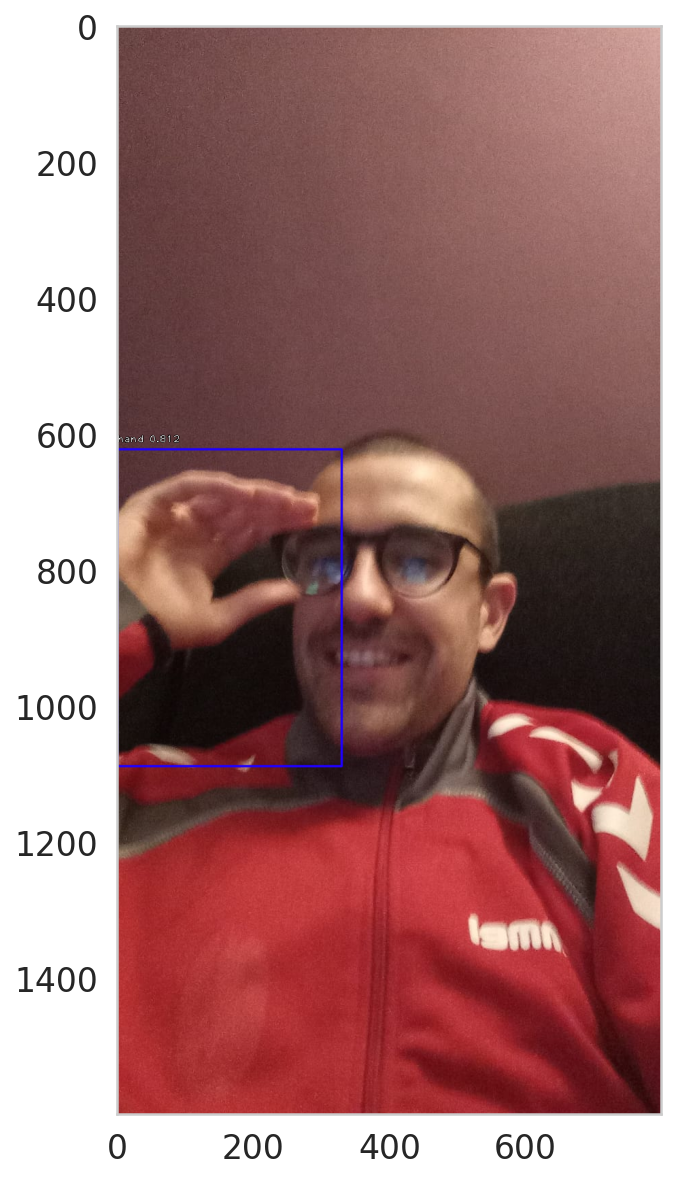

In [0]:
for image in uploaded:
  model_prediction_display(str(image),0.6)

In [0]:
for image in list(images.iterdir()):
  model_prediction_display(str(image),0.6)

# Evaluation

In [0]:
ls snapshots

my_model.h5


In [0]:
model_path

'/content/drive/My Drive/DataProject 4/5. Vision Artificial/05_Modelos_Entrenados/01_Hand_Detection/02_Modelos/Diego/resnet50_csv_tf2_12.h5'

In [0]:
!cp '/content/drive/My Drive/DataProject 4/5. Vision Artificial/05_Modelos_Entrenados/01_Hand_Detection/02_Modelos/Diego/resnet50_csv_tf1_01.h5' ./snapshots/resnet50_csv_evaluate.h5

In [0]:
ls snapshots

_pretrained_resnet50_diego.h5  resnet50_csv_evaluate.h5


In [0]:
!keras_retinanet/bin/evaluate.py csv data_annotations.csv classes.csv snapshots/my_model.h5

Using TensorFlow backend.
2020-04-27 23:05:43.559791: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-04-27 23:05:43.559894: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/lib64-nvidia
2020-04-27 23:05:43.559911: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.
Loading model, this may take a second...
2020-04-27 23:05:44.543922: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2

# Convert model from keras to Tensorflow lite

In [0]:
def freeze_session(session, keep_var_names=None, output_names=None, clear_devices=True):
    """
    Freezes the state of a session into a pruned computation graph.

    Creates a new computation graph where variable nodes are replaced by
    constants taking their current value in the session. The new graph will be
    pruned so subgraphs that are not necessary to compute the requested
    outputs are removed.
    @param session The TensorFlow session to be frozen.
    @param keep_var_names A list of variable names that should not be frozen,
                          or None to freeze all the variables in the graph.
    @param output_names Names of the relevant graph outputs.
    @param clear_devices Remove the device directives from the graph for better portability.
    @return The frozen graph definition.
    """
    graph = session.graph
    with graph.as_default():
        freeze_var_names = list(set(v.op.name for v in tf.global_variables()).difference(keep_var_names or []))
        output_names = output_names or []
        output_names += [v.op.name for v in tf.global_variables()]
        input_graph_def = graph.as_graph_def()
        if clear_devices:
            for node in input_graph_def.node:
                node.device = ""
        frozen_graph = tf.graph_util.convert_variables_to_constants(
            session, input_graph_def, output_names, freeze_var_names)
        return frozen_graph

In [0]:
from keras import backend as K

# Create, compile and train model...

frozen_graph = freeze_session(K.get_session(),
                              output_names=[out.op.name for out in model.outputs])

RuntimeError: ignored

In [0]:
tf.train.write_graph(frozen_graph, "snapshots/", "resnet50_csv_12.pb", as_text=False)
tf.train.write_graph(frozen_graph, "snapshots/", "resnet50_csv_12.pbtxt", as_text=True)

AttributeError: ignored

In [0]:
ls snapshots

my_model.pb  squeezenet.h5


In [0]:
from tensorflow import lite

In [0]:
import keras
import keras_resnet
import keras_resnet.models
from keras_retinanet.models import retinanet

In [0]:
ls 

annotations.csv  examples/         LICENSE           setup.py
build/           images/           README.md         snapshots/
classes.csv      keras_retinanet/  requirements.txt  test_annotations.csv
CONTRIBUTORS.md  keras-retinanet/  setup.cfg         tests/


In [0]:
 from keras_retinanet.models.resnet import ResNetBackbone as backbone

In [0]:
#converter = lite.TFLiteConverter.from_keras_model_file(model)
converter = lite.TFLiteConverter.from_keras_model_file("/content/drive/My Drive/DataProject 4/5. Vision Artificial/05_Modelos_Entrenados/01_Hand_Detection/02_Modelos/Diego/resnet50_csv_tf1_01.h5", custom_objects=backbone('resnet50').custom_objects)
tflite_model = converter.convert()
open("/snapshots/resnet50_csv_12.tflite","wb").write(tflite_model)

NameError: ignored